In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Models
## Activation Functions

In [2]:
class Sigmoid: 
    def __call__(self, x):
        return np.reciprocal(1 + np.exp(-x))
    
    def _x(self, x):
        return self(x) * (1 - self(x))
    
    def _xx(self, x):
        return self._x(x) * (1 - 2 * self(x))
    
    def _xxx(self, x):
        return self._xx(x) * (1 - 2 * self(x)) - 2 * self._x(x) ** 2
    
    def _xxxx(self, x):
        return self._xxx(x) * (1 - 2 * self(x)) - 6 * self._x(x) * self._xx(x)
    
    def __str__(self) -> str: return 'sigmoid'

class Tanh: 
    def __init__(self):
        self._g = Sigmoid()

    def __call__(self, x):
        return 2 * self._g(2 * x) - 1
    
    def _x(self, x):
        return 4 * self._g._x(2 * x)

    def _xx(self, x):
        return 8 * self._g._xx(2 * x)
    
    def _xxx(self, x):
        return 16 * self._g._xxx(2 * x)
    
    def _xxxx(self, x):
        return 32 * self._g._xxxx(2 * x)

    def __str__(self) -> str: return 'tanh'

## Neural Network

In [3]:
class MLP:
    def __init__(self, n=10, activation=Sigmoid) -> None:
        self.w = np.random.rand(4, n)
        self.a = activation()

    def __call__(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a(h)
        h = h @ self.w[3].reshape(-1, 1)
        return h
    
    def _x(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[0]).reshape(-1, 1)
        return h

    def _y(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[1]).reshape(-1, 1)
        return h

    def _xx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[0]**2).reshape(-1, 1)
        return h

    def _yy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[1]**2).reshape(-1, 1)
        return h
    
    def _xy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[1] * self.w[0]).reshape(-1, 1)
        return h
    
    def _yx(self, x, y): return self._xy(x, y)
    
    def _yxx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] * self.w[0] ** 2).reshape(-1, 1)
        return h
    
    def _yyy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] ** 3).reshape(-1, 1)
        return h
    
    def _w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[3] * self.a._x(h)
        d0 = d2 * x
        d1 = d2 * y
        d3 = self.a(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _x_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0] * self.w[3] * self.a._xx(h)
        d0 = d2 * x + self.w[3] * self.a._x(h)
        d1 = d2 * y
        d3 = self.w[0] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _y_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1] * self.w[3] * self.a._xx(h)
        d0 = d2 * x
        d1 = d2 * y + self.w[3] * self.a._x(h)
        d3 = self.w[1] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _xx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[3] * self.a._xx(h)
        d1 = d2 * y
        d3 = self.w[0]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x 
        d1 = d2 * y + 2 * self.w[1] * self.w[3] * self.a._xx(h)
        d3 = self.w[1]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _xy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0] * self.w[1] * self.w[3] * self.a._xxx(h)
        d0 = d2 * x + self.w[1] * self.w[3] * self.a._xx(h)
        d1 = d2 * y + self.w[0] * self.w[3] * self.a._xx(h)
        d3 = self.w[0] * self.w[1] * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yx_w(self, x, y): return self._xy_w(x, y)
    
    def _yxx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[1] * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[1] * self.w[3] * self.a._xxx(h)
        d1 = d2 * y + self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[0]**2 * self.w[1] * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yyy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**3 * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x
        d1 = d2 * y + 3 * self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[1]**3 * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)

## Solution

In [4]:
class NeumannBC:
    def __call__(self, x):
        return 2 * np.sin(np.pi * x)
    
    def _xx(self, x):
        return - 2 * np.pi**2 * np.sin(np.pi * x)

class Solution:
    def __init__(self, N=MLP()):
        self.N = N
        self.g1 = NeumannBC()
    
    def __call__(self, x, y):
        return self.B(x, y) + x * (1-x) * y \
            * (self.N(x, y) - self.N(x, 1) 
                            - self.N._y(x, 1))
    
    def B(self, x, y):
        return y * (self.g1(x) - ((1 - x) * self.g1(0) + x * self.g1(1)))
    
    def _xx(self, x, y):
        return y * self.g1._xx(x) \
            - 2 * y * (self.N(x, y) - self.N(x, 1) - self.N._y(x, 1)) \
            + 2 * (1 - 2 * x) * y * (self.N._x(x, y) - self.N._x(x, 1) - self.N._yx(x, 1))\
            + x * (1 - x) * y * (self.N._xx(x, y) - self.N._xx(x, 1) - self.N._yxx(x, 1))

    def _yy(self, x, y):
        return 2 * x * (1 - x) * (self.N._y(x, y) - self.N._y(x, 1) - self.N._yy(x, 1))\
            + x * (1 - x) * y * (self.N._yy(x, y) - self.N._yy(x, 1) - self.N._yyy(x, 1))
    
    def _xx_w(self, x, y):
        return - 2 * np.expand_dims(y, -1) * (self.N._w(x, y) - self.N._w(x, 1) - self.N._y_w(x, 1)) \
            + 2 * np.expand_dims((1 - 2 * x) * y, -1) * (self.N._x_w(x, y) - self.N._x_w(x, 1) - self.N._yx_w(x, 1))\
            + np.expand_dims(x * (1 - x) * y, -1) * (self.N._xx_w(x, y) - self.N._xx_w(x, 1) - self.N._yxx_w(x, 1))

    def _yy_w(self, x, y):
        return 2 * np.expand_dims(x * (1 - x), -1) * (self.N._y_w(x, y) - self.N._y_w(x, 1) - self.N._yy_w(x, 1))\
            + np.expand_dims(x * (1 - x) * y, -1) * (self.N._yy_w(x, y) - self.N._yy_w(x, 1) - self.N._yyy_w(x, 1))

# Optimization
## PDE Loss

In [5]:
class PDELoss:
    def __init__(self, x, y):
        self.x, self.y = x, y
    
    def f(self, x, y):
        return (2 - np.power(np.pi * y, 2)) * np.sin(np.pi * x)

    def __call__(self, U: Solution, x=None, y=None):
        x = x if x else self.x
        y = y if y else self.y

        u_xx = U._xx(x, y)
        u_yy = U._yy(x, y)
        u_xx_w = U._xx_w(x, y)
        u_yy_w = U._yy_w(x, y)
        f = self.f(x, y)
        
        r = u_xx + u_yy - f
        J = u_xx_w + u_yy_w
        L = 0.5 * np.sum(r ** 2)
        L_w = np.tensordot(r.reshape(-1), J, axes=1)
        return L, L_w, J, r

## Groundtruth

In [6]:
def exact_solution(x, y):
    return y ** 2 * np.sin(np.pi * x)

## Optimizers

In [7]:
from copy import deepcopy

class _Optimizer:
    def __init__(self, solution, alpha, silent=True):
        self.solution = solution
        self.alpha = alpha
        self.silent = silent

    @property
    def parameters(self):
        return self.solution.N.w


class SGD(_Optimizer):    
    def __call__(self, loss):
        f, g, _, _ = loss(self.solution)
        self.parameters[...] = self.parameters - self.alpha * g
        if not self.silent: return f, g
    
    def __str__(self) -> str: return 'SGD'


class Nesterov(_Optimizer):
    def __init__(self, solution, alpha, silent=True):
        super().__init__(solution, alpha, silent)
        self.k = 0
        self.x = np.copy(self.parameters)
        
    def __call__(self, loss):
        f, g, _, _ = loss(self.solution)
        x_ = self.parameters - self.alpha * g
        self.parameters[...] = (1 + self.mu) * x_ - self.mu * self.x
        self.x = x_
        if not self.silent: return f, g 

    @property
    def mu(self):
        return 1 - 3 / (5 + self.k)
    
    def __str__(self) -> str: return 'Nesterov'


class Adam(_Optimizer):
    def __init__(self, solution, alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-8, silent=True):
        super().__init__(solution, alpha, silent)
        self.beta_1, self.beta_2 = beta_1, beta_2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.k = 0
    
    def __call__(self, loss):
        self.k += 1
        f, g, _, _ = loss(self.solution)
        self.m = self.beta_1 * self.m + (1-self.beta_1) * g
        self.v = self.beta_2 * self.v + (1-self.beta_2) * (g ** 2)
        m_hat = self.m / (1 - self.beta_1 ** self.k)
        v_hat = self.v / (1 - self.beta_2 ** self.k)
        self.parameters[...] = self.parameters - self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)
        if not self.silent: return f, g
    
    def __str__(self) -> str: return 'Adam'


class GaussNewton(_Optimizer):
    def __init__(self, solution, alpha=None, silent=True):
        super().__init__(solution, alpha, silent)

    def __call__(self,loss):
        f, g, J, r = loss(self.solution)
        J = J.reshape([len(J), -1])
        B = J.T @ J + 1e-8 * np.eye(J.shape[-1])
        p = - np.linalg.solve(B, g.reshape(-1))
        self.parameters[...] = self.parameters + self.alpha * p.reshape(g.shape)
        if not self.silent: return f, g

    def __str__(self) -> str: return 'Gauss-Newton'


class LevenberqMarquardt(_Optimizer):
    def __init__(self, solution, alpha=None, Δ_max=1, Δ_min=1e-12, eta=0.01, silent=True):
        super().__init__(solution, alpha, silent) # alpha is a dummy hyperparameter
        self.Δ_min = Δ_min
        self.Δ_max = Δ_max
        self.Δ = 0.2 * Δ_max
        self.eta = eta
        self.k = 0

    def __call__(self, loss):
        self.k += 1
        f, g, J, r = loss(self.solution)
      
        J = J.reshape([len(J), -1])
        B = J.T @ J + 1e-8 * np.eye(J.shape[-1])
        p = - np.linalg.solve(B, g.reshape(-1))
        
        if np.linalg.norm(p) > self.Δ:
            p = self._solve_constrained_p(B, g, p)

        f_new, _, _, _ = loss(self._new_solution(p))
        rho = - (f - f_new) / (g.reshape(-1) @ p + 0.5 * p @ (B @ p))
        if self._update_parameter(rho):
            self.parameters[...] = self.parameters + p.reshape(g.shape)
        
        if not self.silent: return f, g

    def _solve_constrained_p(self, B, g, p):
        lam_tol = 0.01 * self.Δ
        lam = 1
        norm_p = np.linalg.norm(p)
        while np.abs(norm_p - self.Δ) > lam_tol:
            B_ = B + lam * np.eye(len(B))
            C = np.linalg.cholesky(B_)
            p = - np.linalg.solve(C.T, np.linalg.solve(C, g.reshape(-1)))
            norm_p = np.linalg.norm(p)
            if np.abs(norm_p - self.Δ) > lam_tol:
                q = np.linalg.solve(C, p)
                norm_q = np.linalg.norm(q)
                lam_new = lam + (norm_p / norm_q) ** 2 * (norm_p - self.Δ) / self.Δ
                lam = 0.5 * lam if lam_new < 0 else lam_new
        return p

    def _update_parameter(self, rho):
        if rho < 0.25:
            self.Δ = np.max([self.Δ_min, 0.25 * self.Δ])
        elif rho > 0.75:
            self.Δ = np.min([self.Δ_max, 2.0 * self.Δ])
        return rho > self.eta

    def _new_solution(self, p):
        solnew = deepcopy(self.solution)
        solnew.N.w[...] = solnew.N.w + p.reshape(solnew.N.w.shape)
        return solnew

    def __str__(self) -> str: return 'Levenberg-Marquardt'

# Training

In [8]:
xx, yy = np.meshgrid(np.linspace(0, 1, 7), np.linspace(0, 1, 7))
xy = np.stack([xx, yy], axis=-1).reshape(-1, 2)
x_, y_ = np.split(xy, 2, -1)

In [9]:
from copy import deepcopy
from tqdm import tqdm

alpha = 3e-4
epochs = 10000
tol = 1e-3
activs = (Sigmoid, Tanh)
optimizers =  (SGD, Nesterov, Adam, LevenberqMarquardt, GaussNewton)
act_list = []
for activ in activs:
    print('σ = {}:'.format(activ()))
    mlp = MLP(activation=activ)
    opt_list = []
    for optimizer in optimizers:
        sol = Solution(deepcopy(mlp)) # start with the same initialization point.
        loss = PDELoss(x_, y_)
        opt = optimizer(sol, alpha, silent=False)
        f_list = np.empty(epochs)
        g_list = np.empty(epochs)
        for i in tqdm(range(epochs), desc='\tTraining with {}'.format(opt)):
            f, g = opt(loss)
            f_list[i] = f
            g_list[i] = np.linalg.norm(g)
            
        opt_list.append([sol, opt, f_list, g_list])
    act_list.append(opt_list)

σ = sigmoid:


	Training with Gauss-Newton: 100%|██████████| 10000/10000 [00:22<00:00, 446.93it/s]


σ = tanh:


	Training with Gauss-Newton: 100%|██████████| 10000/10000 [00:22<00:00, 439.80it/s]


# Plotting

In [10]:
import matplotlib.colors as colors

def plot_lvalue(ax, f_list):
    ax.plot(np.arange(len(f_list)), f_list)
    ax.set_xlabel('k')
    ax.set_ylabel('L(w)')
    ax.set_yscale('log')
    ax.set_title('Final L(w) = {:.4f}'.format(f_list[-1]))

def plot_gnorm(ax, g_list):
    ax.plot(np.arange(len(g_list)), g_list)
    ax.set_xlabel('k')
    ax.set_ylabel(r'$\|\nabla L(w)\|$')
    ax.set_yscale('log')
    ax.set_title(r'Final $\|\nabla L(w)\|$ = {:.4f}'.format(g_list[-1]))

def plot_solution(ax, solution, vmin=None, vmax=None, norm=None):
    xx, yy = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
    xy = np.stack([xx, yy], axis=-1).reshape(-1, 2)
    x, y = np.split(xy, 2, -1)
    zz = solution(x, y).reshape(xx.shape)
    cf = ax.contourf(xx, yy, zz, levels=20, vmin=vmin, vmax=vmax, norm=norm)
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    ax.set_aspect('equal')
    return cf
    
def plot_error(ax, solution, groundtruth, vmin=None, vmax=None, norm=None):
    xx, yy = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
    xy = np.stack([xx, yy], axis=-1).reshape(-1, 2)
    x, y = np.split(xy, 2, -1)
    zz = solution(x, y).reshape(xx.shape)
    ezz = groundtruth(x, y).reshape(xx.shape)
    cf = ax.contourf(xx, yy, zz-ezz, levels=20, cmap='bwr', vmin=vmin, vmax=vmax, norm=norm)
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    ax.set_aspect('equal')
    return cf

def plot_gd(act_list, title=None):
    fig, axes = plt.subplots(len(optimizers), 4, figsize=(4*5, 4*len(optimizers)))
    for i, (sol, opt, f_list, g_list) in enumerate(act_list):
        cf1 = plot_solution(axes[i, 0], sol)
        cf2 = plot_error(axes[i, 1], sol, exact_solution, norm=colors.CenteredNorm())
        plot_lvalue(axes[i, 2], f_list)
        plot_gnorm(axes[i, 3], g_list)
        axes[i, 0].set_ylabel('{}'.format(opt))

        fig.colorbar(cf1, ax=axes[i, 0], shrink=1, location='right')
        fig.colorbar(cf2, ax=axes[i, 1], shrink=1, location='right')

    axes[0, 0].set_title('Solution')
    axes[0, 1].set_title('Error')

    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.show()

C:\Users\geniu\AppData\Local\Temp\ipykernel_446084\574384800.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


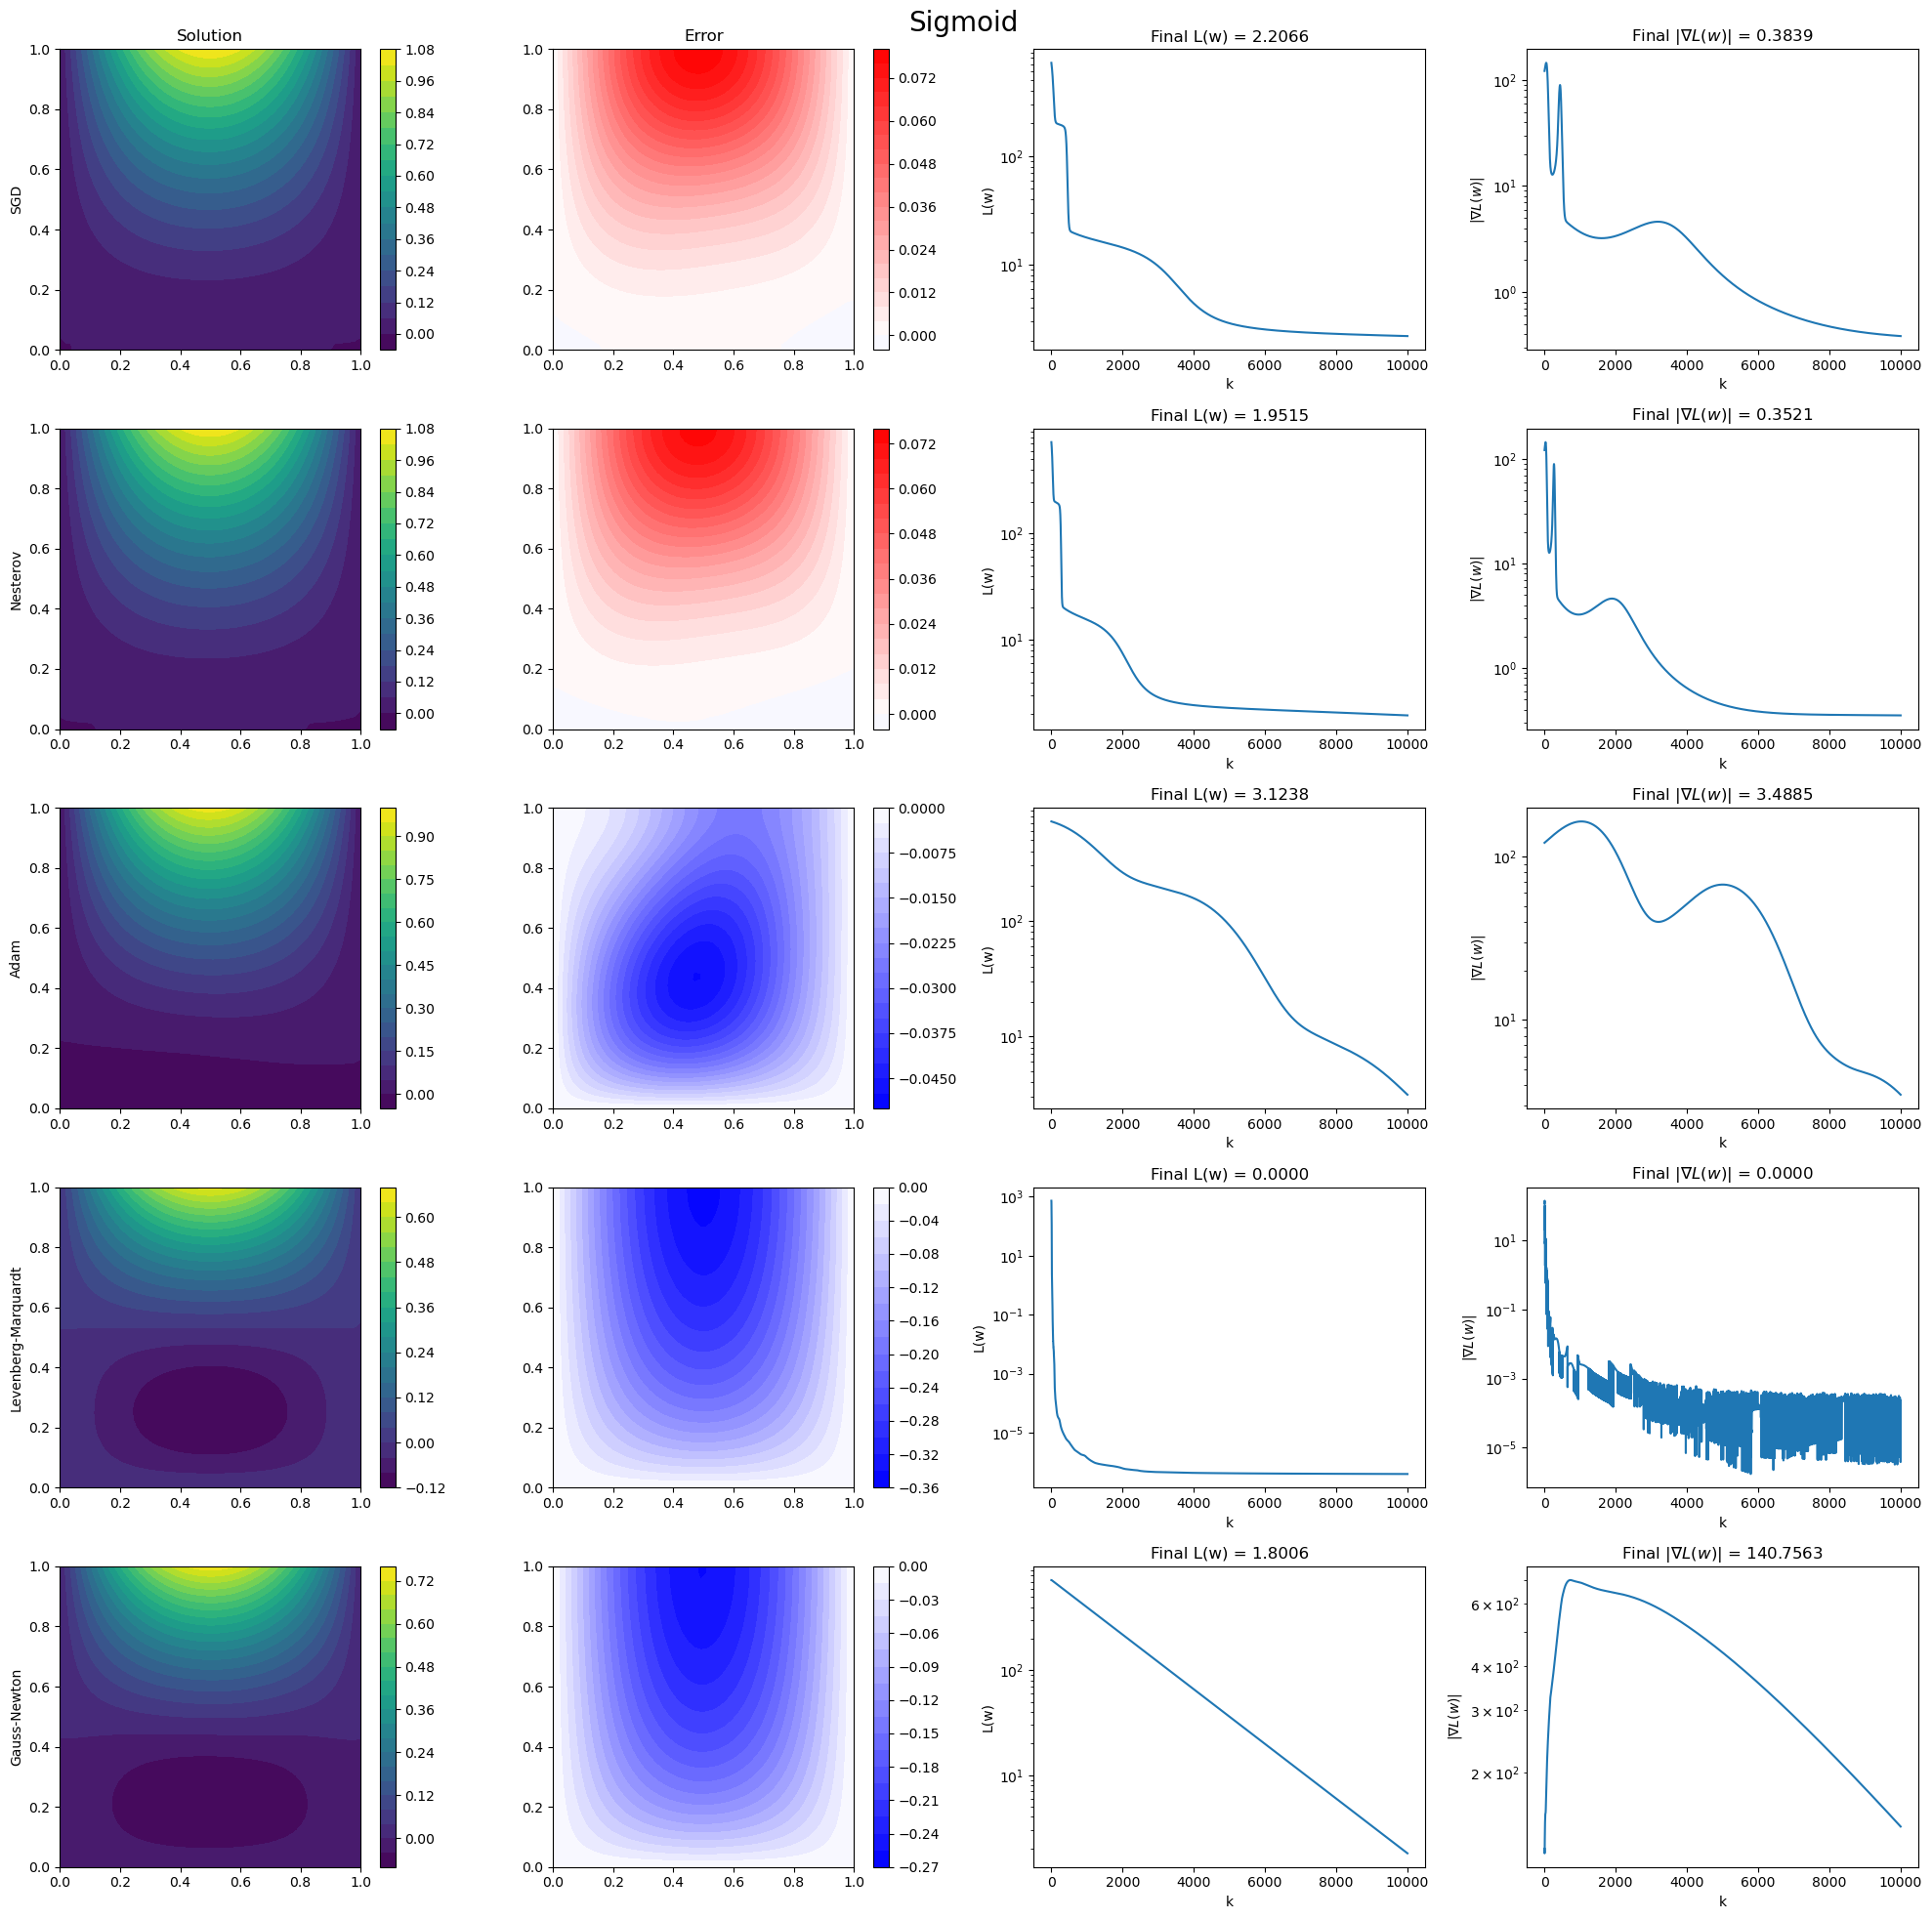

In [11]:
plot_gd(act_list[0], 'Sigmoid')

C:\Users\geniu\AppData\Local\Temp\ipykernel_446084\574384800.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


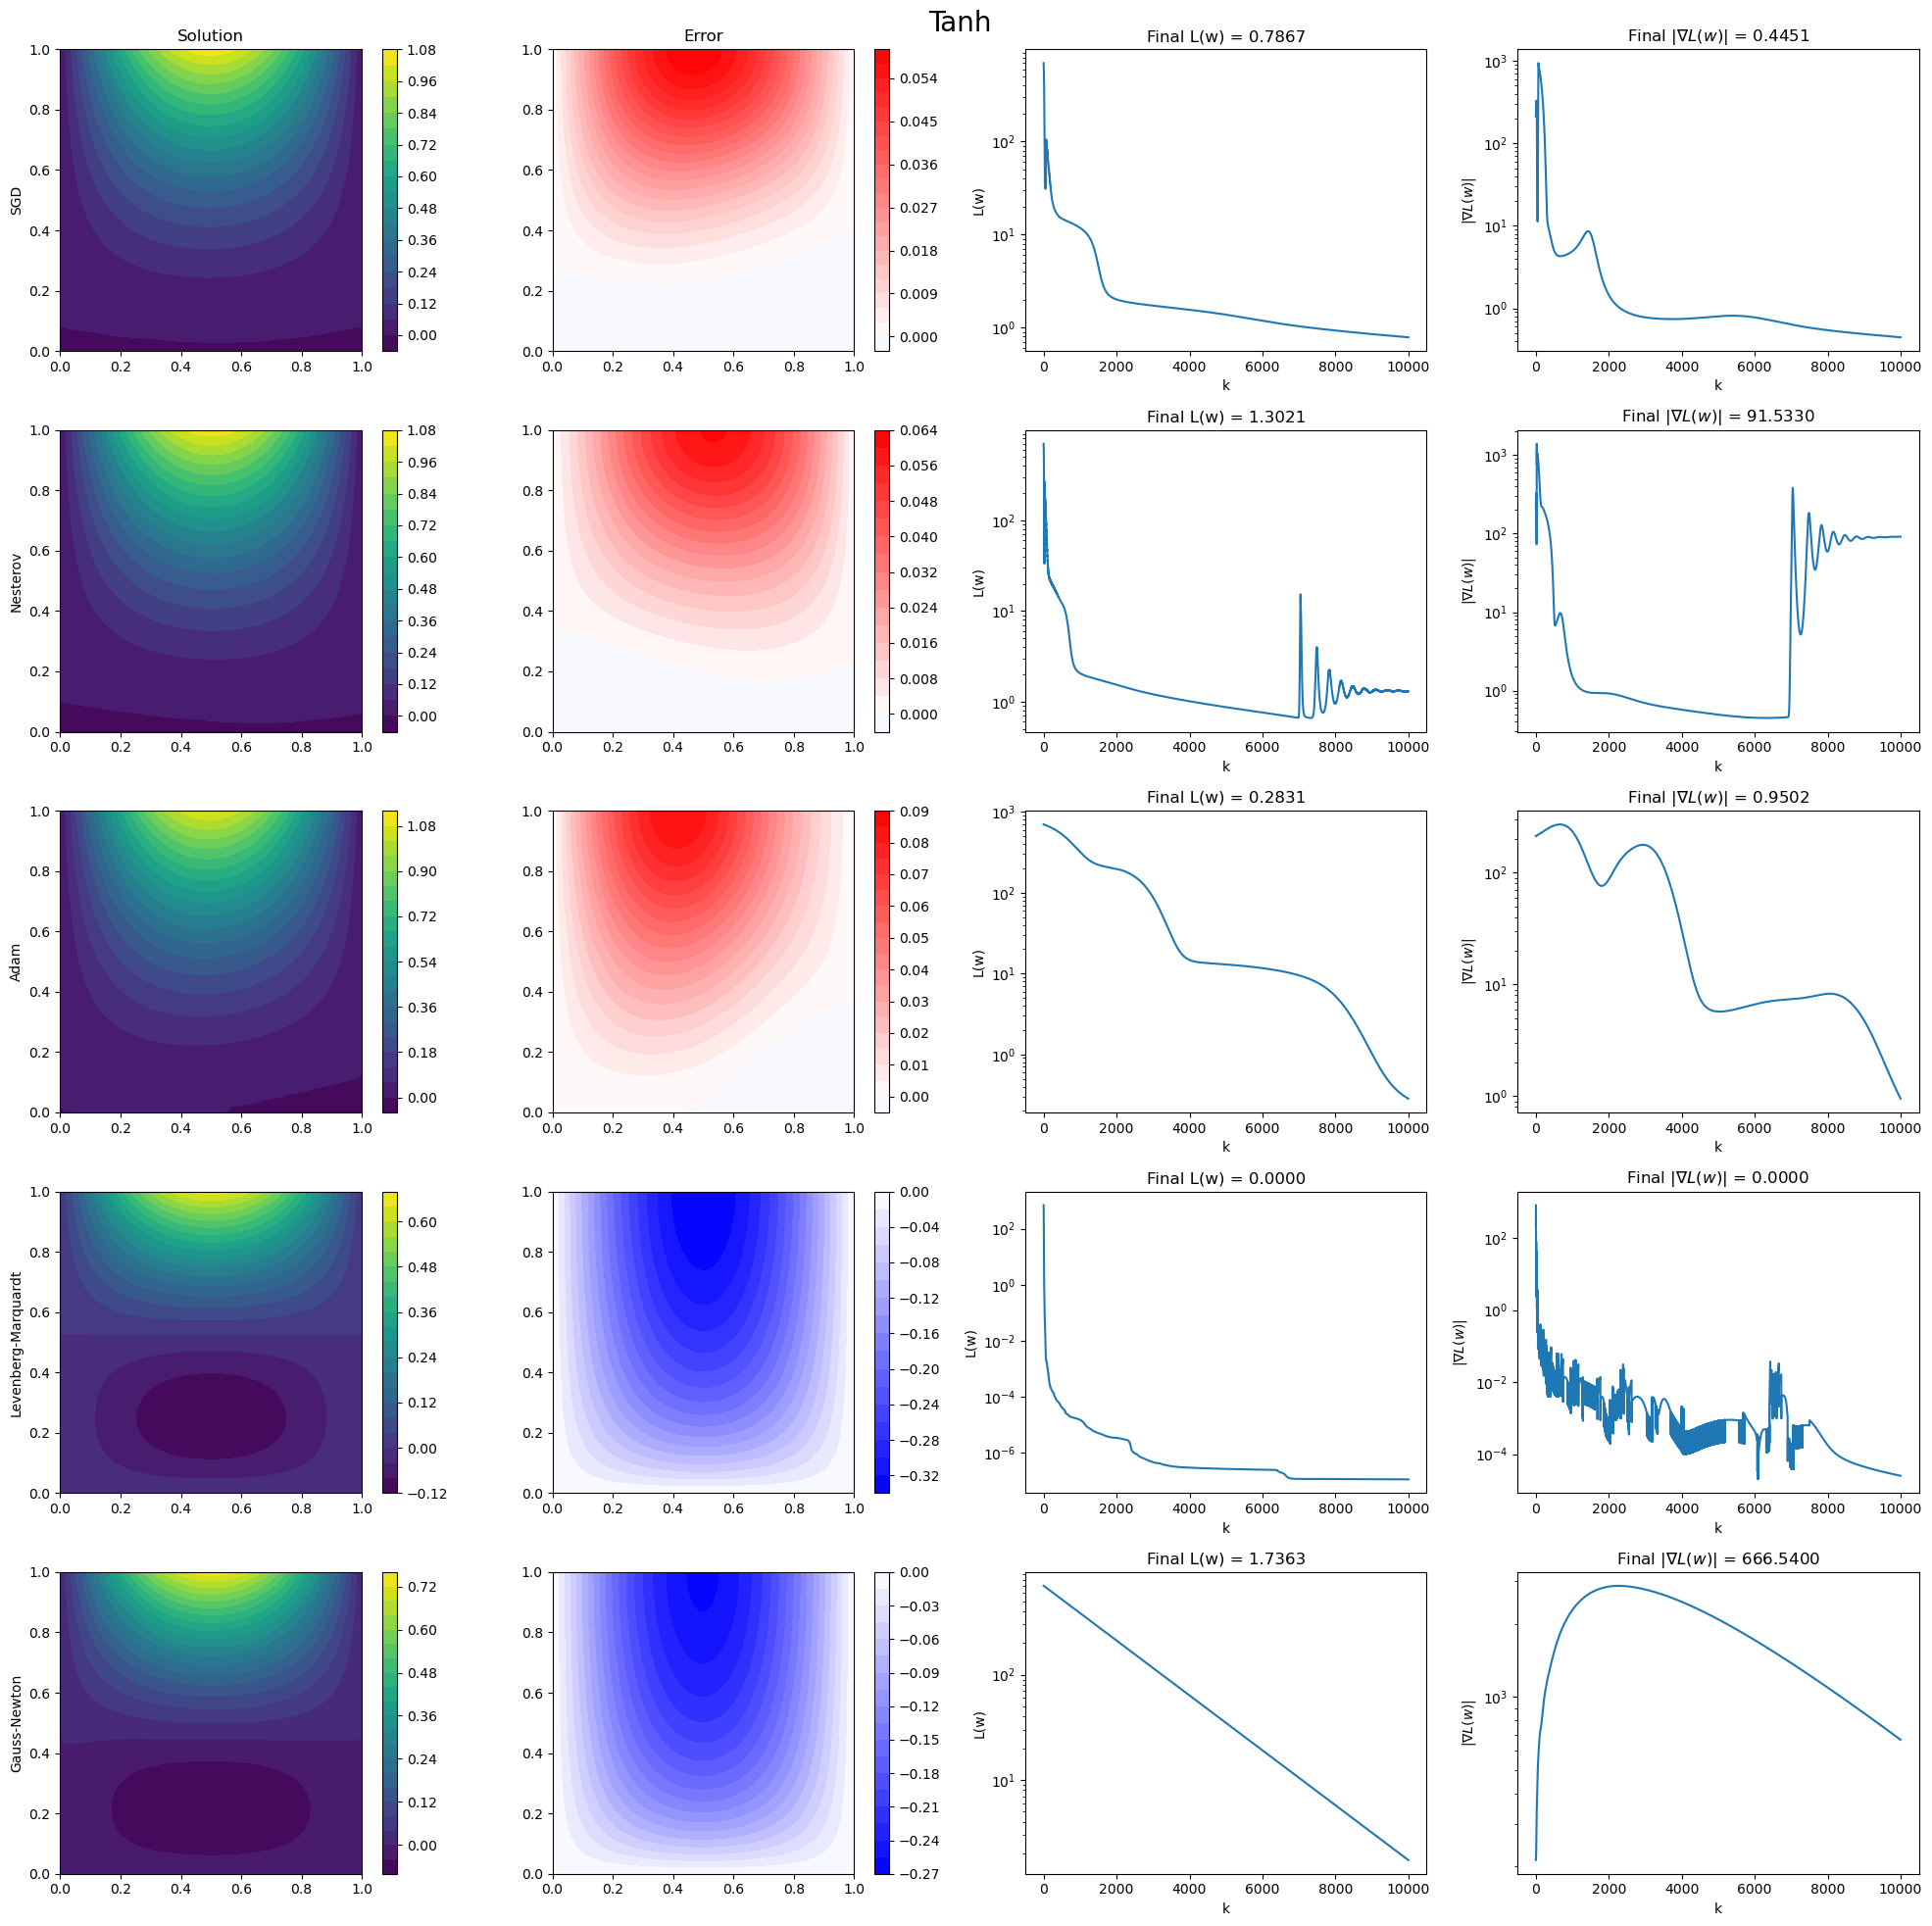

In [12]:
plot_gd(act_list[1], 'Tanh')